In [37]:
!pip install -q sweetviz fancyimpute yellowbrick tpot optuna

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.0/131.0 kB 11.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 81.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.1/215.1 kB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 30.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.0/52.0 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 15.

In [1]:
!pip install -q autoviz

In [2]:
!pip install -q boruta

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.9/57.9 kB 4.6 MB/s eta 0:00:00


In [26]:
!pip install --upgrade jupyter_client ipykernel

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.1/106.1 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.5/117.5 kB 11.0 MB/s eta 0:00:00
  Attempting uninstall: jupyter_client
    Found existing installation: jupyter-client 6.1.12
    Uninstalling jupyter-client-6.1.12:
      Successfully uninstalled jupyter-client-6.1.12
  Attempting uninstall: ipykernel
    Found existing installation: ipykernel 6.17.1
    Uninstalling ipykernel-6.17.1:
      Successfully uninstalled ipykernel-6.17.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipykernel==6.17.1, but you have ipykernel 6.30.1 which is incompatible.
notebook 6.5.7 requires jupyter-client<8,>=5.3.4, but you have jupyter-client 8.6.3 which is incompatible.
jupyter-kernel-gateway 2.5.2 requires jupyter-client<8.0,>=5.2.0, but you have jupyter-client 8.6.3 whi

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

from boruta import BorutaPy
from fancyimpute import KNN

import xgboost as xgb
import optuna
import joblib
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
from yellowbrick.classifier import ConfusionMatrix, ROCAUC

In [2]:
df = pd.read_csv("/content/diabetes.csv")

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [4]:
print("\nوصف البيانات:")
print(df.describe())


وصف البيانات:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000   

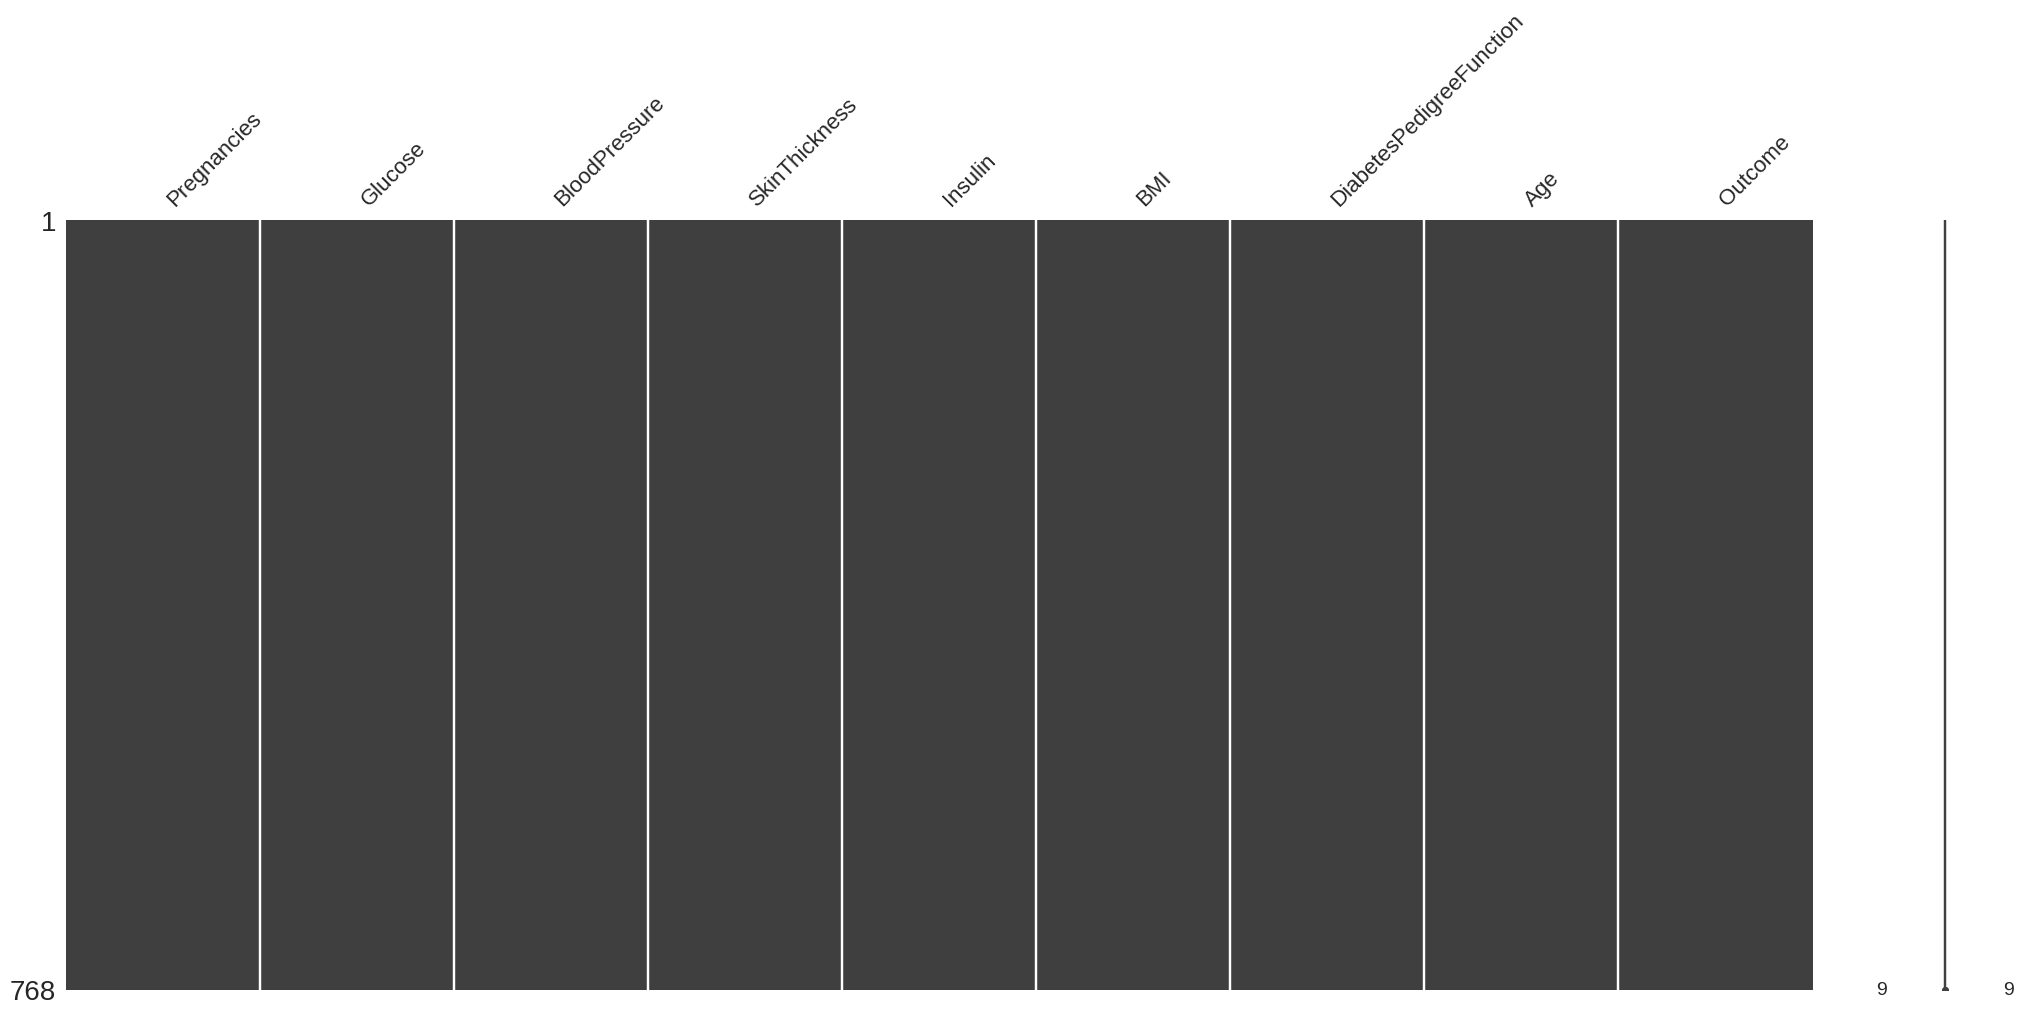

In [5]:
# تصور القيم المفقودة
msno.matrix(df)
plt.show()

In [6]:
imputer = KNN(k=3)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
print("\nالتحقق من القيم المفقودة بعد التعويض:")
print(df_imputed.isnull().sum())

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/fancyimpute/solver.py:55: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/768 with 0 missing, elapsed time: 0.213
Imputing row 101/768 with 0 missing, elapsed time: 0.214
Imputing row 201/768 with 0 missing, elapsed time: 0.214
Imputing row 301/768 with 0 missing, elapsed time: 0.215
Imputing row 401/768 with 0 missing, elapsed time: 0.215
Imputing row 501/768 with 0 missing, elapsed time: 0.217
Imputing row 601/768 with 0 missing, elapsed time: 0.217
Imputing row 701/768 with 0 missing, elapsed time: 0.220

التحقق من القيم المفقودة بعد التعويض:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [7]:
#اختيار الميزات المهمة باستخدام Boruta
X = df_imputed.drop('Outcome', axis=1)
y = df_imputed['Outcome']

In [20]:
rf_estimator = RandomForestClassifier(n_jobs=-1, class_weight='balanced', random_state=42)
boruta_selector = BorutaPy(rf_estimator, n_estimators='auto', random_state=42)
boruta_selector.fit(X.values, y.values)

selected_features = X.columns[boruta_selector.support_].to_list()
print("الخصائص المهمة التي اختارها Boruta:", selected_features)

الخصائص المهمة التي اختارها Boruta: ['Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [21]:
X_selected = X[selected_features]
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [22]:
def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'max_depth': trial.suggest_int('max_depth', 3, 20),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
        'class_weight': 'balanced',
        'random_state': 42
    }
    clf = RandomForestClassifier(**param)
    score = cross_val_score(clf, X_train, y_train, cv=3, scoring='accuracy').mean()
    return score

In [23]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

print("\nأفضل معلمات RandomForest:", study.best_params)
print("أفضل دقة عبر CV:", study.best_value)

[I 2025-09-02 18:42:43,179] A new study created in memory with name: no-name-62d76413-7220-4fde-aa95-37a6b98a375a
[I 2025-09-02 18:42:45,030] Trial 0 finished with value: 0.7622030926191615 and parameters: {'n_estimators': 143, 'max_depth': 10, 'min_samples_split': 4, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.7622030926191615.
[I 2025-09-02 18:42:46,549] Trial 1 finished with value: 0.7605451936872311 and parameters: {'n_estimators': 263, 'max_depth': 4, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': None}. Best is trial 0 with value: 0.7622030926191615.
[I 2025-09-02 18:42:47,741] Trial 2 finished with value: 0.7719910728519049 and parameters: {'n_estimators': 226, 'max_depth': 15, 'min_samples_split': 6, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 2 with value: 0.7719910728519049.
[I 2025-09-02 18:42:48,888] Trial 3 finished with value: 0.7687071576598119 and parameters: {'n_estimators': 218, 'max_depth': 15, 'min


أفضل معلمات RandomForest: {'n_estimators': 300, 'max_depth': 6, 'min_samples_split': 8, 'min_samples_leaf': 2, 'max_features': 'sqrt'}
أفضل دقة عبر CV: 0.7752271640363463


In [24]:
final_clf = RandomForestClassifier(**study.best_params)
final_clf.fit(X_train, y_train)

accuracy = final_clf.score(X_test, y_test)
print(f"\nدقة النموذج على مجموعة الاختبار: {accuracy:.2f}")


دقة النموذج على مجموعة الاختبار: 0.75


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


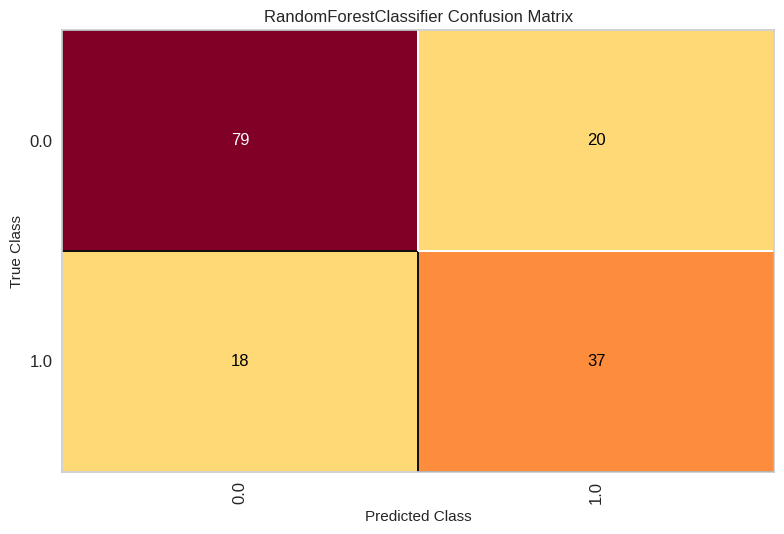

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


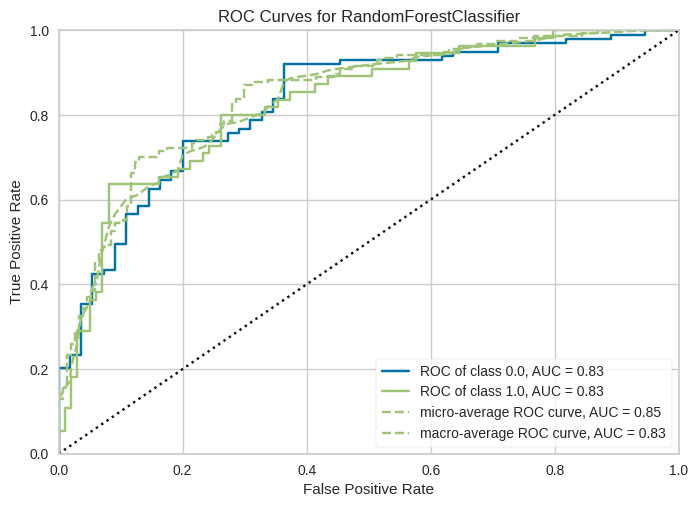

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [25]:
cm = ConfusionMatrix(final_clf)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

roc = ROCAUC(final_clf)
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

In [26]:
joblib.dump(final_clf, "diabetes_model.pkl")
print("تم حفظ النموذج في diabetes_model.pkl")

تم حفظ النموذج في diabetes_model.pkl


In [27]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()

Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


In [28]:
df_report = AV.AutoViz(
    filename='',       # لا يوجد ملف، سنستخدم DataFrame مباشرة
    dfte=df_imputed,
    depVar='Outcome',  # العمود الهدف
    verbose=1,
    chart_format='svg' # صيغة الرسوم
)

Shape of your Data Set loaded: (768, 9)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  8
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    8 Predictors classified...
        No variables removed since no ID or low-information variables found in data set

################ Binary_Classification problem #####################
To fix these data quality 

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
Pregnancies,float64,0.000000,NA,0.000000,17.000000,Column has 4 outliers greater than upper bound (13.50) or lower than lower bound(-6.50). Cap them or remove them.
Glucose,float64,0.000000,NA,0.000000,199.000000,Column has 5 outliers greater than upper bound (202.12) or lower than lower bound(37.12). Cap them or remove them.
BloodPressure,float64,0.000000,NA,0.000000,122.000000,Column has 45 outliers greater than upper bound (107.00) or lower than lower bound(35.00). Cap them or remove them.
SkinThickness,float64,0.000000,NA,0.000000,99.000000,Column has 1 outliers greater than upper bound (80.00) or lower than lower bound(-48.00). Cap them or remove them.
Insulin,float64,0.000000,NA,0.000000,846.000000,Column has 34 outliers greater than upper bound (318.12) or lower than lower bound(-190.88). Cap them or remove them.
BMI,float64,0.000000,NA,0.000000,67.100000,Column has 19 outliers greater than upper bound (50.55) or lower than lower bound(13.35). Cap them or remove them.
DiabetesPedigreeFunction,float64,0.000000,NA,0.078000,2.420000,Column has 29 outliers greater than upper bound (1.20) or lower than lower bound(-0.33). Cap them or remove them.
Age,float64,0.000000,NA,21.000000,81.000000,Column has 9 outliers greater than upper bound (66.50) or lower than lower bound(-1.50). Cap them or remove them.
Outcome,float64,0.000000,0,0.000000,1.000000,Target column


Total Number of Scatter Plots = 36
All Plots done
Time to run AutoViz = 4 seconds 

 ###################### AUTO VISUALIZATION Completed ########################
